# Brain-MDD Project
- Capstone Project

In [ ]:
import dotenv
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import mne
import enum

dotenv.load_dotenv()

class ChannelMapping(enum.Enum):
    Fp1 = 22
    Fp2 = 9
    F3 = 24
    F4 = 124
    C3 = 36
    C4 = 104
    P3 = 52
    P4 = 92
    O1 = 70
    O2 = 83
    F7 = 33
    F8 = 122
    T3 = 45
    T4 = 108
    T5 = 58
    T6 = 96

In [4]:
# Get the path to the EEG data and report
EEG_DIR_PATH = os.getenv("EEG_DIR_PATH")
RAW_DIR_PATH = os.getenv("EEG_DIR_PATH") + "/raw"
SELECT_16_DIR_PATH = os.getenv("EEG_DIR_PATH") + "/16channels"
filteredDataPath = os.getenv("EEG_DIR_PATH") + "/filtered"
reportPath = os.getenv("EEG_REPORT_PATH")
EPOCHS_DIR_PATH = os.getenv("EEG_DIR_PATH") + "/epochs"

report = pd.read_excel(reportPath)
reportDf = pd.DataFrame(report)
reportDf["subject id"] = reportDf["subject id"].astype(str)
print(type(reportDf["subject id"][0]))

<class 'str'>


# Preprocessing
- Channel selection
- 5th-Order Butterworth bandpass filter
- ICA (next sprint)
- save as .fif file format + map with label
- do epoch

In [5]:
# select the channels of interest; 16 channels
for file in os.listdir(RAW_DIR_PATH):
    if file.endswith(".npy"):
        data = np.load(RAW_DIR_PATH + "/" + file)
        selectedChannelsEeg = []
        for channel in ChannelMapping:
            selectedChannelsEeg.append(data[channel.value])
        selectedChannelsEeg = np.array(selectedChannelsEeg)
        print(selectedChannelsEeg.shape)
        np.save(EEG_DIR_PATH + "/16channels/" + file, selectedChannelsEeg)

(16, 75652)
(16, 75114)
(16, 75189)
(16, 75201)
(16, 75176)
(16, 75126)
(16, 78639)
(16, 75101)
(16, 75339)
(16, 75226)
(16, 75126)
(16, 75750)
(16, 75101)
(16, 75688)
(16, 75151)
(16, 75114)
(16, 75139)
(16, 75138)
(16, 75126)
(16, 76039)
(16, 75188)
(16, 75525)
(16, 75251)
(16, 75513)
(16, 75158)
(16, 75201)
(16, 75139)
(16, 75113)
(16, 75101)
(16, 75376)
(16, 75126)
(16, 75164)
(16, 75127)
(16, 83876)
(16, 75163)
(16, 75189)
(16, 75139)
(16, 75275)
(16, 75151)
(16, 83164)
(16, 82651)
(16, 75151)
(16, 75089)
(16, 75114)
(16, 75276)
(16, 75126)
(16, 75289)
(16, 75401)
(16, 75351)
(16, 75389)
(16, 75402)


In [6]:
channelNames = [channel.name for channel in ChannelMapping]
channelTypes = ["eeg"] * len(channelNames)
sfreq = 250

# filtering and saving the data
for eeg16ChannelFile in os.listdir(SELECT_16_DIR_PATH):
    if eeg16ChannelFile.endswith(".npy"):
        data = np.load(SELECT_16_DIR_PATH + "/" + eeg16ChannelFile)
        info = mne.create_info(channelNames, sfreq, channelTypes)
        raw = mne.io.RawArray(data, info)
        
        montage = mne.channels.make_standard_montage("standard_1020")
        raw.set_montage(montage)
        
        raw.filter(0.5, 40) # Bandpass filter 0.5 - 40 Hz
        
        # ica = mne.preprocessing.ICA(n_components=16, random_state=97, max_iter=800)
        # ica.fit(raw)
        # raw = ica.apply(raw)
        
        eeg16ChannelFile = eeg16ChannelFile.split(".")[0]
        raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)

Creating RawArray with float64 data, n_channels=16, n_times=75652
    Range : 0 ... 75651 =      0.000 ...   302.604 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010015.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010015.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75114
    Range : 0 ... 75113 =      0.000 ...   300.452 secs
Ready.
Filtering raw data in 1 contigu

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010015.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010028.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)


Creating RawArray with float64 data, n_channels=16, n_times=75189
    Range : 0 ... 75188 =      0.000 ...   300.752 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010002.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010002.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75201
    Range : 0 ... 75200 =      0.000 ...   300.800 secs
Ready.
Filtering raw data in 1 contigu

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010016.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010006.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010006.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75101
    Range : 0 ... 75100 =      0.000 ...   300.400 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010006.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010010.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Creating RawArray with float64 data, n_channels=16, n_times=75126
    Range : 0 ... 75125 =      0.000 ...   300.500 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010011.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010011.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75750
    Range : 0 ... 75749 =      0.000 ...   302.996 secs
Ready.
Filtering raw data in 1 contigu

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010011.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030006.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030006.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75151
    Range : 0 ... 75150 =      0.000 ...   300.600 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030004.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030004.fif
[done]
Creating RawA

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030006.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030004.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020014.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020014.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75126
    Range : 0 ... 75125 =      0.000 ...   300.500 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030005.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030005.fif
[done]
Creating RawA

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02020014.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030005.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030014.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75525
    Range : 0 ... 75524 =      0.000 ...   302.096 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030002.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030002.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75251
    Range : 0 ...

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02020013.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030017.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75201
    Range : 0 ... 75200 =      0.000 ...   300.800 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020023.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020023.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75139
    Range : 0 ...

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02020023.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02020022.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020020.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020020.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75126
    Range : 0 ... 75125 =      0.000 ...   300.500 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020021.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020021.fif
[done]
Creating RawA

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02020020.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02020021.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030020.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030020.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=83876
    Range : 0 ... 83875 =      0.000 ...   335.500 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020025.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020025.fif
[done]
Creating RawA

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030020.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02020025.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02020018.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75139
    Range : 0 ... 75138 =      0.000 ...   300.552 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030009.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02030009.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75275
    Range : 0 ...

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030009.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02030021.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010008.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010008.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75151
    Range : 0 ... 75150 =      0.000 ...   300.600 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 p

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010008.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010034.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010022.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010022.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75126
    Range : 0 ... 75125 =      0.000 ...   300.500 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010022.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010026.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

Writing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010018.fif
Closing /Users/wachiii/Workschii/brain-mdd/data/filtered/02010018.fif
[done]
Creating RawArray with float64 data, n_channels=16, n_times=75389
    Range : 0 ... 75388 =      0.000 ...   301.552 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010018.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1636512049.py:22: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data/filtered/02010024.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_DIR_PATH + "/filtered/" + eeg16ChannelFile + ".fif", overwrite=True)
/var/folders/kf/plh_bl0s64

In [7]:
# map data with labels
mddDataLst = []
controlDataLst = []

# file name is matched with the "subject id" and label is "type"
for file in os.listdir(filteredDataPath):
    if file.endswith(".fif"):
        subjectId = file.split(".")[0]
        subjectId = subjectId[1:]
        subjectId = str(subjectId)
        result = reportDf[reportDf['subject id'] == subjectId]
        if result.empty:
            continue
        label = result["type"].values[0]
        if label == "MDD":
            mddDataLst.append(subjectId)
        elif label == "HC":
            controlDataLst.append(subjectId)
        os.rename(FILTERED_DIR_PATH + "/" + file, FILTERED_DIR_PATH + "/" + subjectId + "_" + label + ".fif")

In [8]:
# do epoch
healthyControlEpochs = []
mddEpochs = []

# fs = 250, duration = 5s, samples = 250 * 5 = 1250
for file in os.listdir(FILTERED_DIR_PATH):
    if file.endswith(".fif"):
        raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
        subjectId = file.split("_")[0]
        label = file.split("_")[1].split(".")[0]
        if label == "MDD":
            mddEpochs.append(mne.make_fixed_length_epochs(raw, duration=5, preload=True))
        elif label == "HC":
            healthyControlEpochs.append(mne.make_fixed_length_epochs(raw, duration=5, preload=True))
            
# save the epochs
mddEpochs = mne.concatenate_epochs(mddEpochs)
healthyControlEpochs = mne.concatenate_epochs(healthyControlEpochs)
mddEpochs.save(EPOCHS_DIR_PATH + "/mdd-epo.fif")
healthyControlEpochs.save(EPOCHS_DIR_PATH + "/control-epo.fif")

Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2010016_MDD.fif...
    Range : 0 ... 75200 =      0.000 ...   300.800 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2010006_MDD.fif...
    Range : 0 ... 78638 =      0.000 ...   314.552 secs
Ready.
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Loading data for 62 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2010030_MDD.fif...
    Range : 0 ... 75401 =      0.000 ...   301.604 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2010016_MDD.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2010006_MDD.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671

0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2030005_HC.fif...
    Range : 0 ... 75125 =      0.000 ...   300.500 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2020022_HC.fif...
    Range : 0 ... 75138 =      0.000 ...   300.552 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2030009_HC.fif...
    Range : 0 ... 75138 =      0.000 ...   300.552 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 or

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2030005_HC.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2020022_HC.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/167122

60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2010005_MDD.fif...
    Range : 0 ... 75225 =      0.000 ...   300.900 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2010004_MDD.fif...
    Range : 0 ... 75338 =      0.000 ...   301.352 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2010022_MDD.fif...
    Range : 0 ... 75275 =      0.000 ...   301.100 secs
Re

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2010005_MDD.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2010004_MDD.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671

0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2030020_HC.fif...
    Range : 0 ... 75126 =      0.000 ...   300.504 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2020019_HC.fif...
    Range : 0 ... 75162 =      0.000 ...   300.648 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2020015_HC.fif...
    Range : 0 ... 75138 =      0.000 ...   300.552 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 or

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2030020_HC.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2020019_HC.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/167122

No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2030002_HC.fif...
    Range : 0 ... 75524 =      0.000 ...   302.096 secs
Ready.
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2020025_HC.fif...
    Range : 0 ... 83875 =      0.000 ...   335.500 secs
Ready.
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated
Loading data for 67 events and 1250 original time points ...
0 bad epochs dropped
Opening raw data file /Users/wachiii/Workschii/brain-mdd/data//filtered/2020029_HC.fif...
    Range : 0 ... 75113 =      0.000 ...   300.452 secs
Ready.
Not setting metadata
60

/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2030002_HC.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/1671224928.py:8: RuntimeWarning: This filename (/Users/wachiii/Workschii/brain-mdd/data//filtered/2020025_HC.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILTERED_DIR_PATH + "/" + file)
/var/folders/kf/plh_bl0s64g1swyqvnc651pr0000gn/T/ipykernel_9090/167122

FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

## Feature Extraction: PSD

In [1]:
import dotenv
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from brainmdd.features.psd import EEGPowerSpectrum
import mne
import enum

dotenv.load_dotenv()

class ChannelMapping(enum.Enum):
    Fp1 = 22
    Fp2 = 9
    F3 = 24
    F4 = 124
    C3 = 36
    C4 = 104
    P3 = 52
    P4 = 92
    O1 = 70
    O2 = 83
    F7 = 33
    F8 = 122
    T3 = 45
    T4 = 108
    T5 = 58
    T6 = 96

# Declare Global Variables
NUM_CHANNELS = 16
MODMA_SFREQ = 250
EEG_DIR_PATH = os.getenv("EEG_DIR_PATH")
RAW_DIR_PATH = os.getenv("EEG_DIR_PATH") + "/raw"
SELECT_16_DIR_PATH = os.getenv("EEG_DIR_PATH") + "/16channels"
FILTERED_DIR_PATH = os.getenv("EEG_DIR_PATH") + "/filtered"
EPOCHS_DIR_PATH = os.getenv("EEG_DIR_PATH") + "/epochs"

# Declare Feature Dictionary
featureDict = {
    "norm_power": {
        "mdd": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            },
        "control": {
            "delta": [],
            "theta": [],
            "alpha": [],
            "beta": [],
            "gamma": []
            }
        }
    }    

In [2]:
# Load the epochs
mddEpochs = mne.read_epochs(EPOCHS_DIR_PATH + "/mdd-epo.fif")
controlEpochs = mne.read_epochs(EPOCHS_DIR_PATH + "/control-epo.fif")
mddEpochs = mddEpochs.get_data()
controlEpochs = controlEpochs.get_data()
# check the shape of the epochs
print(mddEpochs.shape)
print(controlEpochs.shape)

Reading /Users/wachiii/Workschii/brain-mdd/data/epochs/mdd-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4996.00 ms
        0 CTF compensation matrices available
Not setting metadata
1328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/wachiii/Workschii/brain-mdd/data/epochs/control-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4996.00 ms
        0 CTF compensation matrices available
Not setting metadata
1753 matching events found
No baseline correction applied
0 projection items activated
(1328, 16, 1250)
(1753, 16, 1250)


In [3]:
psdObjMdd = EEGPowerSpectrum(mddEpochs, 250, ifNormalize=True)
mddPsdFeatures = psdObjMdd.run()
psdObjCtrl = EEGPowerSpectrum(controlEpochs, 250, ifNormalize=True)
controlPsdFeatures = psdObjCtrl.run()
print(mddPsdFeatures.shape)
print(controlPsdFeatures.shape)

(1328, 5, 16)
(1753, 5, 16)


In [4]:
# save the features as .npy files in feature directory
np.save("features/mdd-psd-features.npy", mddPsdFeatures)
np.save("features/control-psd-features.npy", controlPsdFeatures)

In [8]:
for epoch in mddPsdFeatures:
    bandCounter = 0
    for band in epoch:
        if bandCounter == 0:
            featureDict["norm_power"]["mdd"]["delta"].append(band)
        elif bandCounter == 1:
            featureDict["norm_power"]["mdd"]["theta"].append(band)
        elif bandCounter == 2:
            featureDict["norm_power"]["mdd"]["alpha"].append(band)
        elif bandCounter == 3:
            featureDict["norm_power"]["mdd"]["beta"].append(band)
        elif bandCounter == 4:
            featureDict["norm_power"]["mdd"]["gamma"].append(band)
        bandCounter += 1

for epoch in controlPsdFeatures:
    bandCounter = 0
    for band in epoch:
        if bandCounter == 0:
            featureDict["norm_power"]["control"]["delta"].append(band)
        elif bandCounter == 1:
            featureDict["norm_power"]["control"]["theta"].append(band)
        elif bandCounter == 2:
            featureDict["norm_power"]["control"]["alpha"].append(band)
        elif bandCounter == 3:
            featureDict["norm_power"]["control"]["beta"].append(band)
        elif bandCounter == 4:
            featureDict["norm_power"]["control"]["gamma"].append(band)
        bandCounter += 1                                                           

In [9]:
# check the shape of the features
print(type(featureDict["norm_power"]["mdd"]["delta"]))
print(len(featureDict["norm_power"]["mdd"]["delta"]))
print(type(featureDict["norm_power"]["mdd"]["delta"][0]))
print((featureDict["norm_power"]["mdd"]["delta"][0].shape))
print(featureDict["norm_power"]["mdd"]["delta"][0])

print("------------------")

print(type(featureDict["norm_power"]["control"]["delta"]))
print(len(featureDict["norm_power"]["control"]["delta"]))
print(type(featureDict["norm_power"]["control"]["delta"][0]))
print((featureDict["norm_power"]["control"]["delta"][0].shape))
temp = featureDict["norm_power"]["control"]["delta"]
temp = np.array(temp)
print(temp.shape)
print(featureDict["norm_power"]["control"]["delta"][0])

<class 'list'>
1328
<class 'numpy.ndarray'>
(16,)
[0.83056823 0.87734384 0.90729667 0.87926266 0.90732366 0.40353021
 0.84019323 0.67680983 0.72123247 0.42196012 0.83618242 0.91446568
 0.75412763 0.59408818 0.42842383 0.66620692]
------------------
<class 'list'>
1753
<class 'numpy.ndarray'>
(16,)
(1753, 16)
[0.98623744 0.98451825 0.98785362 0.98789097 0.99189221 0.96553099
 0.99675056 0.37090386 0.99507843 0.36207738 0.99450565 0.98194598
 0.96151343 0.94749412 0.99297081 0.8671709 ]


# Permutation test and False Discovery Rate Correction
" Topological maps of p-values from this method can help visualize the spatial distribution of significant effects across channels. "

### STEP 1: Perform the permutation test on the feature values for each channel -> p-value for each channel
" Shuffle the data many times (e.g., 10,000 times) and calculate the test statistic for each shuffle to create a null distribution."
- **Compute the Observed Test Statistic**
    - Calculate the difference between the means (or medians) of the two groups in the original data. This is your observed test statistic.
- **Combine and Shuffle the Data** 
    - Pool the data from both groups into one dataset.
    - Randomly shuffle (permute) the data.
    - Split the shuffled data into two groups of the same size as the original groups.
- **Recalculate the Test Statistic**
    - Compute the test statistic for the permuted groups (e.g., mean difference).
- **Repeat Many Times**
    - Repeat the shuffle and recalculation process many times (e.g., 10,000 permutations) to build a null distribution of test statistics.
- **Calculate the p-value**
    - Compare the observed test statistic to the null distribution.
- **RESULT: p-value** 
    - (If the p-value is small (e.g., < 0.05 < 0.05), reject the null hypothesis (h0 = no difference))

### STEP 2: Apply FDR Correction to control the FDR
- use Benjamini-Hochberg procedure.
- RESULT: corrected p-value 

### STEP 3: Visualizing FDR-Corrected Results on a topographical brain map

In [10]:
import numpy as np
from statsmodels.stats.multitest import fdrcorrection

NUM_PERMUTATIONS = 50000
NUM_CHANNELS = 16

mddBands shape: (1328, 16)
controlBands shape: (1753, 16)
pValues: [0.12714 0.      0.54658 0.      0.23064 0.      0.14198 0.      0.59664
 0.15932 0.15014 0.      0.45628 0.      0.09804 0.     ]
pValues shape: (16,)


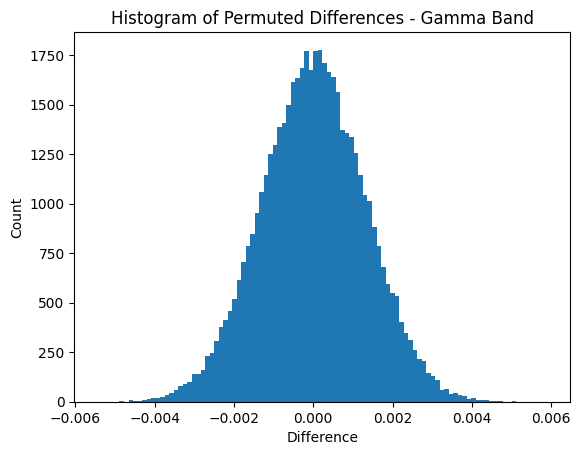

In [11]:
mddBands = np.array(featureDict["norm_power"]["mdd"]["gamma"])
controlBands = np.array(featureDict["norm_power"]["control"]["gamma"])
print(f"mddBands shape: {mddBands.shape}")
print(f"controlBands shape: {controlBands.shape}")

pValues = []

for channel in range(NUM_CHANNELS):
    observedDiff = np.mean(mddBands[:, channel]) - np.mean(controlBands[:, channel])
    poolData = np.hstack((mddBands[:, channel], controlBands[:, channel]))
    permDiff = []
    
    # for _ in range(NUM_PERMUTATIONS):
    #     np.random.shuffle(poolData)
    #     permControl = poolData[:len(mddBands)]
    #     permMdd = poolData[len(mddBands):]
    #     permDiff.append(np.mean(permMdd) - np.mean(permControl))
        
    permDiff = np.array(permDiff)
    pValue = np.sum(np.abs(permDiff) >= np.abs(observedDiff)) / len(permDiff)
    pValues.append(pValue)

pValues = np.array(pValues)
print(f"pValues: {pValues}")
print(f"pValues shape: {pValues.shape}")

# plot the histogram of permuted differences
plt.hist(permDiff, bins=100)
plt.xlabel('Difference')
plt.ylabel('Count')
plt.title('Histogram of Permuted Differences - Gamma Band')
plt.show()

In [198]:
# mddBands = np.array(featureDict["norm_power"]["mdd"]["gamma"])
# controlBands = np.array(featureDict["norm_power"]["control"]["gamma"])

# pValues = []

# for channel in range(NUM_CHANNELS):
#     observedDiff = np.mean(controlBands[:, channel]) - np.mean(mddBands[:, channel])
#     poolData = np.hstack((controlBands[:, channel], mddBands[:, channel]))
#     permDiff = []
    
#     for _ in range(NUM_PERMUTATIONS):
#         np.random.shuffle(poolData)
#         permControl = poolData[:len(controlBands)]
#         permMdd = poolData[len(controlBands):]
#         permDiff.append(np.mean(permControl) - np.mean(permMdd))
        
# #     permDiff = np.array(permDiff)
# #     pValue = np.mean(np.abs(permDiff) >= np.abs(observedDiff))
# #     pValues.append(pValue)
    
# # pValues = np.array(pValues)

# # plot the histogram of permuted differences
# plt.hist(permDiff, bins=100)
# plt.show()

### STEP 2: Apply FDR Correction to control the FDR
- use Benjamini-Hochberg procedure.
- RESULT: corrected p-value 


In [199]:
aplha = 0.05
# numTests = len(pValues)
# sortedPValues = np.sort(pValues)
# bhCriticalValue = (np.array(range(1, numTests + 1)) / numTests) * aplha

# fdrSignificant = sortedPValues <= bhCriticalValue   # Compare the sorted p-values to the critical value

# fdrSignificantReordered = np.zeros_like(fdrSignificant)
# fdrSignificantReordered[np.argsort(pValues)] = fdrSignificant

# print(fdrSignificantReordered)

fdrSignificant, fdrCorrectedPValue = fdrcorrection(pValues, alpha=aplha)
print(fdrCorrectedPValue)
print(fdrCorrectedPValue.shape)
print(fdrSignificant)

[0.21314909 0.         0.582976   0.         0.28243692 0.
 0.21314909 0.         0.5966     0.21384    0.21314909 0.
 0.51805714 0.         0.196      0.        ]
(16,)
[False  True False  True False  True False  True False False False  True
 False  True False  True]


### STEP 3: Visualizing FDR-Corrected Results on a topographical brain map

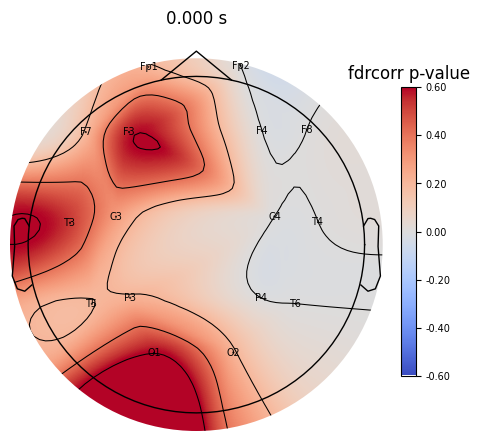

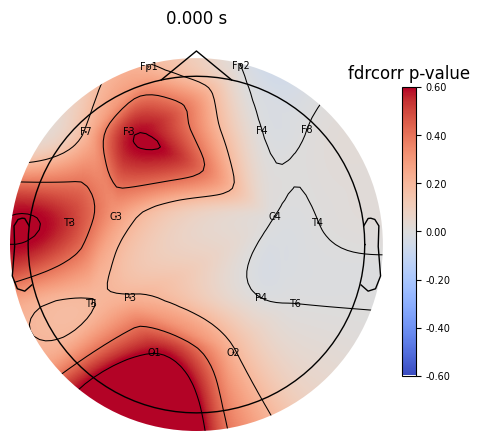

In [200]:
channelNames = [channel.name for channel in ChannelMapping]
channelTypes = ["eeg"] * len(channelNames)
montage = mne.channels.make_standard_montage("standard_1020")
info = mne.create_info(channelNames, MODMA_SFREQ, channelTypes)
info.set_montage(montage)

fdrCorrectedPValue = fdrCorrectedPValue.reshape((16, 1))
evoked = mne.EvokedArray(fdrCorrectedPValue, info)
evoked.plot_topomap(times=0, scalings=1, time_unit='s', size=3, cmap='coolwarm', show_names=True, cbar_fmt="%0.2f", units="fdrcorr p-value")

(1328, 16)


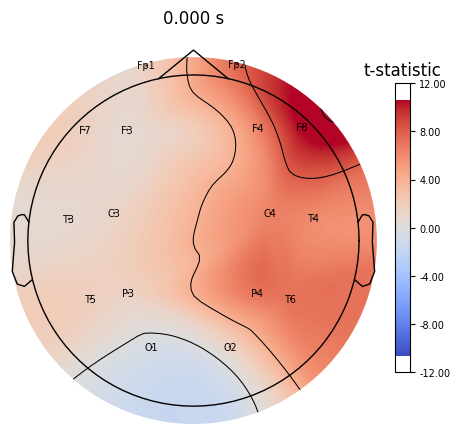

TypeError: only length-1 arrays can be converted to Python scalars

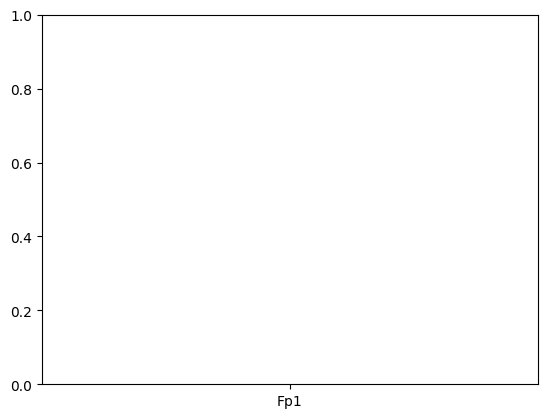

In [ ]:
# # For delta band
# mddDeltaBands = np.array(featureDict["norm_power"]["mdd"]["gamma"])
# controlDeltaBands = np.array(featureDict["norm_power"]["control"]["gamma"])
# studentTTestDelta = np.zeros(mddDeltaBands.shape[1])
# print(mddDeltaBands.shape)

# for channel in range(NUM_CHANNELS):
#     tStats, pVal = ttest_ind(mddDeltaBands[:, channel], controlDeltaBands[:, channel])
#     studentTTestDelta[channel] = tStats
# studentTTestDelta = studentTTestDelta.reshape((16, 1))

# channelNames = [channel.name for channel in ChannelMapping]
# channelTypes = ["eeg"] * len(channelNames)
# montage = mne.channels.make_standard_montage("standard_1020")
# info = mne.create_info(channelNames, MODMA_SFREQ, channelTypes)
# info.set_montage(montage)
# evoked = mne.EvokedArray(studentTTestDelta, info)
# evoked.plot_topomap(times=0, scalings=1, size=3, cmap="coolwarm", show_names=True, cbar_fmt="%0.2f", units="t-statistic")
# # plot bar graph
# plt.bar(channelNames, studentTTestDelta)
# plt.xlabel("Channels")
# plt.ylabel("T-Statistic")
# plt.title("T-Statistic for Delta Band")
# plt.show()


## Classification

Random State:  10604
Accuracy:  0.6531440162271805
Sensitivity:  0.5441458733205374


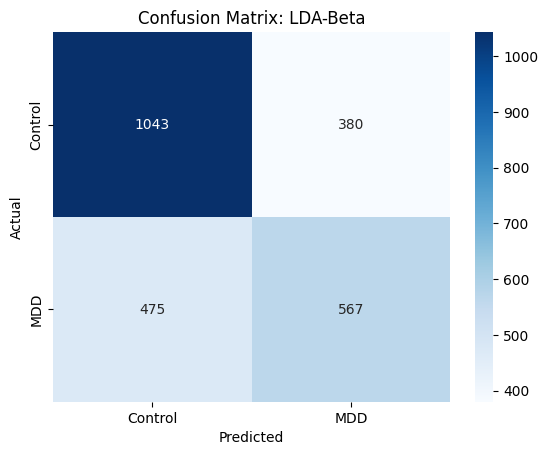

         f1  precision  sensitivity  specificity  accuracy
0  0.570136   0.598733     0.544146     0.732959  0.653144


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example data with 16 features
deltaMdd = featureDict["norm_power"]["mdd"]["beta"]
deltaControl = featureDict["norm_power"]["control"]["beta"]
deltaMdd = np.array(deltaMdd)
deltaControl = np.array(deltaControl)

# Concatenate the data
X = np.concatenate((deltaMdd, deltaControl), axis=0)
y = np.concatenate((np.ones(len(deltaMdd)), np.zeros(len(deltaControl))), axis=0)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train-test split
for randomState in range(1, 15000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=randomState, shuffle=True)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    if lda.score(X_test, y_test) > 0.65:
        y_pred = lda.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        if sensitivity > 0.52:
            print("Random State: ", randomState)
            print("Accuracy: ", lda.score(X_test, y_test))
            print("Sensitivity: ", sensitivity)
            break

# # Create a mesh grid
# x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
# y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# # Predict on the grid
# Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot the decision boundary
# plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label='Test')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('LDA Decision Boundary')
# plt.legend()
# plt.show()

# Confusion matrix
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xticks([0.5, 1.5], ['Control', 'MDD'])
plt.yticks([0.5, 1.5], ['Control', 'MDD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: LDA-Beta')
plt.show()

# Calculate metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


# Show metrics as a dataframe
df = pd.DataFrame({
    "f1": [f1],
    "precision": [precision],
    "sensitivity": [sensitivity],
    "specificity": [specificity],
    "accuracy": [accuracy]
})
print(df)

Random State:  5388
F1 Score:  0.8049627791563275
Precision:  0.8360824742268042
Sensitivity:  0.7760765550239235
Specificity:  0.8880281690140845
Accuracy:  0.8405679513184584


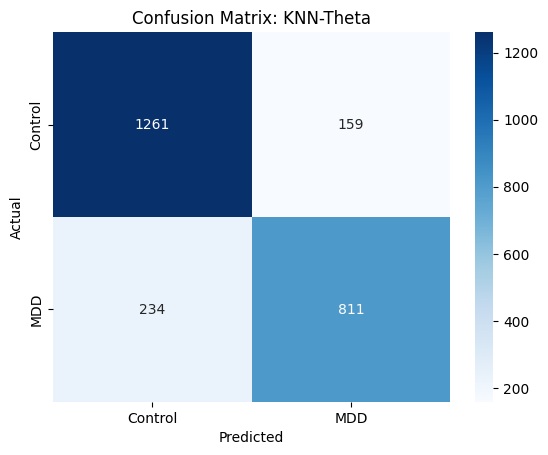

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Train-test split

thetaMdd = featureDict["norm_power"]["mdd"]["gamma"]
thetaControl = featureDict["norm_power"]["control"]["gamma"]
thetaMdd = np.array(thetaMdd)
thetaControl = np.array(thetaControl)

# Concatenate the data
X = np.concatenate((thetaMdd, thetaControl), axis=0)
y = np.concatenate((np.ones(len(thetaMdd)), np.zeros(len(thetaControl))), axis=0)

for randomState in range(1, 10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=randomState, shuffle=True)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > 0.84:
        y_pred = knn.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sensitivity = recall_score(y_test, y_pred)
        if sensitivity > 0.52:
            print("Random State: ", randomState)

            f1 = f1_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            print("F1 Score: ", f1)
            print("Precision: ", precision)
            specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
            print("Sensitivity: ", sensitivity  )
            print("Specificity: ", specificity)
            print("Accuracy: ", knn.score(X_test, y_test))
            break
        
# Confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xticks([0.5, 1.5], ['Control', 'MDD'])
plt.yticks([0.5, 1.5], ['Control', 'MDD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: KNN-Theta')
plt.show()


In [236]:
# load model parameters of KNN
import pickle
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))

# show the parameters of the model
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)
# insignt parameters of the model
print(loaded_model.get_params())
# print as a dataframe
df = pd.DataFrame({
    "f1": [f1],
    "precision": [precision],
    "sensitivity": [sensitivity],
    "specificity": [specificity],
    "accuracy": [accuracy]
})
print(df)


KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
         f1  precision  sensitivity  specificity  accuracy
0  0.804963   0.836082     0.776077     0.888028  0.653144
